In [37]:
import torch as tch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [38]:
dtype = tch.FloatTensor

# neural net's hyperparams

N, D_in, H, D_out = 4, 2, 2, 1

lr = 1e-1
mom = .9

# build neural net model

'''
Input: 2
Hidden: ReLU - 2
Output: Sigmoid - 1

Loss: Cross Entropy
Batch: Full batch
'''

x = tch.from_numpy(np.array([[0.,0.], [1.,0.], [0.,1.], [1.,1.]])).type(dtype)
y = tch.from_numpy(np.array([[0.],[1.],[1.],[0.]])).type(dtype)

x = Variable(x, requires_grad=False)
y = Variable(y, requires_grad=False)

model = tch.nn.Sequential(
    tch.nn.Linear(D_in, H),
    tch.nn.ReLU(),
    tch.nn.Linear(H, D_out),
    tch.nn.Sigmoid()
)

# loss and optimization

loss_fn = tch.nn.BCELoss(size_average=True)
optim = tch.optim.SGD(model.parameters(), lr=lr, momentum=mom)

In [39]:
# this will update the learning curve plot in runtime

def upd_plt(ax, T, losses):
    vmin = np.min(losses)
    vmax = np.max(losses)

    ax.set_ylim([vmin, vmax])
    ax.set_ymargin(.5)

    ax.plot(T, losses, 'r-')
    ax.get_figure().canvas.draw()
    

<IPython.core.display.Javascript object>


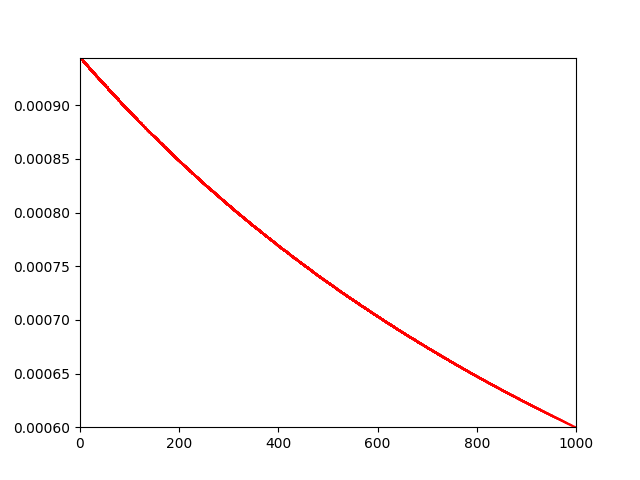

Variable containing:
 0.0017
 0.9998
 0.9998
 0.0002
[torch.FloatTensor of size 4x1]



In [42]:
epochs = 1000

# plot x, y

T = []
losses = []

# prepare plot

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(T, losses, 'r-')

upd_intrvl = np.floor(.01*epochs)
hmin = 0
hmax = epochs
ax.set_xlim([hmin, hmax])

fig.show()
plt.ion()

# learn

'''
Note about learning:

This is a minimal neural network that can learn XOR.

Sometimes, due to random initialization, learning will stagnate.
This is most probably due to a combination of random weights and biases that leads to zero activation in hidden ReLU layer.

If using larger model, this becomes more unlikely to occur

'''

for t in range(1, epochs):
    
    o = model(x)
    
    loss = loss_fn(o, y)
    
    # clear previous grads
    
    optim.zero_grad()
    
    # calculate new grads
    
    loss.backward()
    
    # update params
    
    optim.step()
    
    # update plot
    
    T.append(t)
    losses.append(loss.data[0])
    
    if t % upd_intrvl == 0:
        upd_plt(ax, T, losses)

    # print output at the end
        
    if t % (epochs-1) == 0:
        print(o)
        
upd_plt(ax, T, losses)